In [1]:
# Data Analysis and Wrangling 
import numpy as np
import pandas as pd
import random as rnd
from datetime import date
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Aquire Data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [3]:
train_df.head()
# test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
print (train_df.columns.values)

['UniqueID' 'disbursed_amount' 'asset_cost' 'ltv' 'branch_id'
 'supplier_id' 'manufacturer_id' 'Current_pincode_ID' 'Date.of.Birth'
 'Employment.Type' 'DisbursalDate' 'State_ID' 'Employee_code_ID'
 'MobileNo_Avl_Flag' 'Aadhar_flag' 'PAN_flag' 'VoterID_flag'
 'Driving_flag' 'Passport_flag' 'PERFORM_CNS.SCORE'
 'PERFORM_CNS.SCORE.DESCRIPTION' 'PRI.NO.OF.ACCTS' 'PRI.ACTIVE.ACCTS'
 'PRI.OVERDUE.ACCTS' 'PRI.CURRENT.BALANCE' 'PRI.SANCTIONED.AMOUNT'
 'PRI.DISBURSED.AMOUNT' 'SEC.NO.OF.ACCTS' 'SEC.ACTIVE.ACCTS'
 'SEC.OVERDUE.ACCTS' 'SEC.CURRENT.BALANCE' 'SEC.SANCTIONED.AMOUNT'
 'SEC.DISBURSED.AMOUNT' 'PRIMARY.INSTAL.AMT' 'SEC.INSTAL.AMT'
 'NEW.ACCTS.IN.LAST.SIX.MONTHS' 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'
 'AVERAGE.ACCT.AGE' 'CREDIT.HISTORY.LENGTH' 'NO.OF_INQUIRIES'
 'loan_default']


In [5]:
train_df.info()
print (40*'--')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
train_df.describe(include=['O'])

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [8]:
# Analysing by Pivoting features

train_df[['Employment.Type','loan_default']].groupby(['Employment.Type'], as_index=False).mean().sort_values(by='loan_default',ascending=False)

,Employment.Type,loan_default
1,Self employed,0.227657
0,Salaried,0.203458


In [9]:
train_df[['PERFORM_CNS.SCORE.DESCRIPTION','loan_default']].groupby(['PERFORM_CNS.SCORE.DESCRIPTION'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,PERFORM_CNS.SCORE.DESCRIPTION,loan_default
12,M-Very High Risk,0.304581
11,L-Very High Risk,0.280423
10,K-High Risk,0.278120
8,I-Medium Risk,0.272629
19,Not Scored: Sufficient History Not Available,0.255777
9,J-High Risk,0.252401
7,H-Medium Risk,0.241867
13,No Bureau History Available,0.231313
18,Not Scored: Only a Guarantor,0.213115
17,Not Scored: Not Enough Info available on the c...,0.209695


In [10]:
train_df[['branch_id','loan_default']].groupby(['branch_id'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,branch_id,loan_default
74,251,0.343913
75,254,0.324308
44,97,0.313625
20,36,0.296762
39,78,0.291476
62,153,0.286127
51,117,0.283154
59,146,0.282552
49,105,0.282468
28,65,0.281847


In [11]:
train_df[['manufacturer_id','loan_default']].groupby(['manufacturer_id'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,manufacturer_id,loan_default
9,153,0.333333
1,48,0.272531
0,45,0.228499
6,120,0.220750
2,49,0.218787
4,67,0.217464
3,51,0.207947
5,86,0.204594
7,145,0.200514
8,152,0.000000


In [12]:
train_df[['State_ID','loan_default']].groupby(['State_ID'],as_index=False).mean().sort_values(by='loan_default',ascending=False)

,State_ID,loan_default
12,13,0.306587
13,14,0.275866
1,2,0.271394
11,12,0.265558
16,17,0.245803
7,8,0.229485
17,18,0.220067
8,9,0.217950
14,15,0.211527
3,4,0.207845


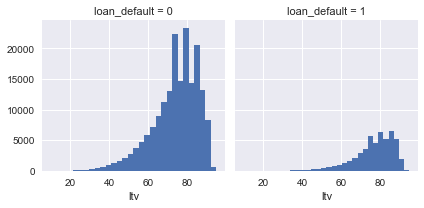

In [13]:
g = sns.FacetGrid(train_df, col='loan_default')
g.map(plt.hist, 'ltv', bins=30)

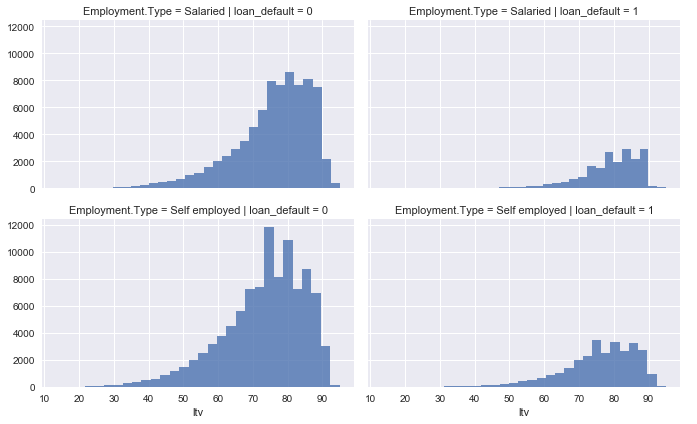

In [14]:
# grid = sns.FacetGrid(train_df, col='Employment.Type', hue='loan_default')
grid = sns.FacetGrid(train_df, col='loan_default', row='Employment.Type', size=3, aspect=1.6)
grid.map(plt.hist, 'ltv', alpha=.8, bins=30)
grid.add_legend();

In [22]:
train_df['PRI_NO_OF_ACCOUNTSBand'] = pd.cut(train_df['PRI.NO.OF.ACCTS'], 10)
train_df[['PRI_NO_OF_ACCOUNTSBand', 'loan_default']].groupby(['PRI_NO_OF_ACCOUNTSBand'], as_index=False).mean().sort_values(by='PRI_NO_OF_ACCOUNTSBand', ascending=True)

,PRI_NO_OF_ACCOUNTSBand,loan_default
0,"(-0.453, 45.3]",0.217090
1,"(45.3, 90.6]",0.194245
2,"(90.6, 135.9]",0.300000
3,"(135.9, 181.2]",0.250000
4,"(181.2, 226.5]",0.000000
5,"(226.5, 271.8]",0.000000
6,"(271.8, 317.1]",NaN
7,"(317.1, 362.4]",0.000000
8,"(362.4, 407.7]",NaN
9,"(407.7, 453.0]",1.000000


In [16]:
train_df['PRI.ACTIVE.ACCTSBand'] = pd.cut(train_df['PRI.ACTIVE.ACCTS'], 5)
train_df[['PRI.ACTIVE.ACCTSBand', 'loan_default']].groupby(['PRI.ACTIVE.ACCTSBand'], as_index=False).mean().sort_values(by='PRI.ACTIVE.ACCTSBand', ascending=True)

,PRI.ACTIVE.ACCTSBand,loan_default
0,"(-0.144, 28.8]",0.217077
1,"(28.8, 57.6]",0.142857
2,"(57.6, 86.4]",0.000000
3,"(86.4, 115.2]",NaN
4,"(115.2, 144.0]",0.000000


In [17]:
train_df['PRI.OVERDUE.ACCTSBand'] = pd.cut(train_df['PRI.OVERDUE.ACCTS'], 5)
train_df[['PRI.OVERDUE.ACCTSBand', 'loan_default']].groupby(['PRI.OVERDUE.ACCTSBand'], as_index=False).mean().sort_values(by='PRI.OVERDUE.ACCTSBand', ascending=True)

,PRI.OVERDUE.ACCTSBand,loan_default
0,"(-0.025, 5.0]",0.217067
1,"(5.0, 10.0]",0.213542
2,"(10.0, 15.0]",0.258065
3,"(15.0, 20.0]",0.333333
4,"(20.0, 25.0]",0.000000


In [24]:
train_df['PRI.CURRENT.BALANCEBand'] = pd.cut(train_df['PRI.CURRENT.BALANCE'], 10)
train_df[['PRI.CURRENT.BALANCEBand', 'loan_default']].groupby(['PRI.CURRENT.BALANCEBand'], as_index=False).mean().sort_values(by='PRI.CURRENT.BALANCEBand', ascending=True)

,PRI.CURRENT.BALANCEBand,loan_default
0,"(-6781499.216, 3642025.6]",0.217622
1,"(3642025.6, 13962347.2]",0.137052
2,"(13962347.2, 24282668.8]",0.117647
3,"(24282668.8, 34602990.4]",0.176471
4,"(34602990.4, 44923312.0]",0.230769
5,"(44923312.0, 55243633.6]",0.200000
6,"(55243633.6, 65563955.2]",0.000000
7,"(65563955.2, 75884276.8]",0.000000
8,"(75884276.8, 86204598.4]",NaN
9,"(86204598.4, 96524920.0]",0.000000


In [26]:
train_df['PRI.SANCTIONED.AMOUNTBand'] = pd.cut(train_df['PRI.SANCTIONED.AMOUNT'], 5)
train_df[['PRI.SANCTIONED.AMOUNTBand', 'loan_default']].groupby(['PRI.SANCTIONED.AMOUNTBand'], as_index=False).mean().sort_values(by='PRI.SANCTIONED.AMOUNTBand', ascending=True)

,PRI.SANCTIONED.AMOUNTBand,loan_default
0,"(-1000000.0, 200000000.0]",0.217068
1,"(200000000.0, 400000000.0]",NaN
2,"(400000000.0, 600000000.0]",NaN
3,"(600000000.0, 800000000.0]",NaN
4,"(800000000.0, 1000000000.0]",1.000000


In [44]:
train_df['ltvBand'] = pd.cut(train_df['ltv'], 10)
train_df[['ltvBand', 'loan_default']].groupby(['ltvBand'], as_index=False).mean().sort_values(by='ltvBand', ascending=True)

,ltvBand,loan_default
0,"(9.945, 18.527]",0.066667
1,"(18.527, 27.024]",0.169065
2,"(27.024, 35.521]",0.127413
3,"(35.521, 44.018]",0.129683
4,"(44.018, 52.515]",0.130960
5,"(52.515, 61.012]",0.148949
6,"(61.012, 69.509]",0.173445
7,"(69.509, 78.006]",0.208740
8,"(78.006, 86.503]",0.252581
9,"(86.503, 95.0]",0.262592


In [41]:
train_df['SEC.NO.OF.ACCTSBand'] = pd.cut(train_df['SEC.NO.OF.ACCTS'], 4)
train_df[['SEC.NO.OF.ACCTSBand', 'loan_default']].groupby(['SEC.NO.OF.ACCTSBand'], as_index=False).mean().sort_values(by='SEC.NO.OF.ACCTSBand', ascending=True)

,SEC.NO.OF.ACCTSBand,loan_default
0,"(-0.052, 13.0]",0.217099
1,"(13.0, 26.0]",0.149254
2,"(26.0, 39.0]",0.142857
3,"(39.0, 52.0]",0.000000


In [39]:
train_df['SEC.ACTIVE.ACCTSBand'] = pd.cut(train_df['SEC.ACTIVE.ACCTS'], 6)
train_df[['SEC.ACTIVE.ACCTSBand', 'loan_default']].groupby(['SEC.ACTIVE.ACCTSBand'], as_index=False).mean().sort_values(by='SEC.ACTIVE.ACCTSBand', ascending=True)

,SEC.ACTIVE.ACCTSBand,loan_default
0,"(-0.036, 6.0]",0.217090
1,"(6.0, 12.0]",0.180556
2,"(12.0, 18.0]",0.090909
3,"(18.0, 24.0]",0.250000
4,"(24.0, 30.0]",0.000000
5,"(30.0, 36.0]",0.000000


In [34]:
train_df['SEC.OVERDUE.ACCTSBand'] = pd.cut(train_df['SEC.OVERDUE.ACCTS'], 5)
train_df[['SEC.OVERDUE.ACCTSBand', 'loan_default']].groupby(['SEC.OVERDUE.ACCTSBand'], as_index=False).mean().sort_values(by='SEC.OVERDUE.ACCTSBand', ascending=True)

,SEC.OVERDUE.ACCTSBand,loan_default
0,"(-0.008, 1.6]",0.217046
1,"(1.6, 3.2]",0.254335
2,"(3.2, 4.8]",0.157895
3,"(4.8, 6.4]",0.285714
4,"(6.4, 8.0]",0.000000


In [35]:
train_df['SEC.CURRENT.BALANCEBand'] = pd.cut(train_df['SEC.CURRENT.BALANCE'], 5)
train_df[['SEC.CURRENT.BALANCEBand', 'loan_default']].groupby(['SEC.CURRENT.BALANCEBand'], as_index=False).mean().sort_values(by='SEC.CURRENT.BALANCEBand', ascending=True)

,SEC.CURRENT.BALANCEBand,loan_default
0,"(-611254.499, 6746852.8]",0.217069
1,"(6746852.8, 14068352.6]",0.363636
2,"(14068352.6, 21389852.4]",0.000000
3,"(21389852.4, 28711352.2]",0.000000
4,"(28711352.2, 36032852.0]",0.000000


In [45]:
train_df['PRIMARY.INSTAL.AMTBand'] = pd.cut(train_df['PRIMARY.INSTAL.AMT'], 5)
train_df[['PRIMARY.INSTAL.AMTBand', 'loan_default']].groupby(['PRIMARY.INSTAL.AMTBand'], as_index=False).mean().sort_values(by='PRIMARY.INSTAL.AMTBand', ascending=True)

,PRIMARY.INSTAL.AMTBand,loan_default
0,"(-25642.806, 5128561.2]",0.217074
1,"(5128561.2, 10257122.4]",0.166667
2,"(10257122.4, 15385683.6]",0.250000
3,"(15385683.6, 20514244.8]",0.333333
4,"(20514244.8, 25642806.0]",0.000000


In [51]:
train_df['NEW.ACCTS.IN.LAST.SIX.MONTHSBand'] = pd.cut(train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'], 5)
train_df[['NEW.ACCTS.IN.LAST.SIX.MONTHSBand', 'loan_default']].groupby(['NEW.ACCTS.IN.LAST.SIX.MONTHSBand'], as_index=False).mean().sort_values(by='NEW.ACCTS.IN.LAST.SIX.MONTHSBand', ascending=True)

,NEW.ACCTS.IN.LAST.SIX.MONTHSBand,loan_default
0,"(-0.035, 7.0]",0.217121
1,"(7.0, 14.0]",0.178771
2,"(14.0, 21.0]",0.363636
3,"(21.0, 28.0]",0.000000
4,"(28.0, 35.0]",0.000000


In [146]:
train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand'] = pd.cut(train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], 5)
train_df[['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand', 'loan_default']].groupby(['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand'], as_index=False).mean().sort_values(by='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand', ascending=True)

,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand,loan_default
0,"(-0.02, 4.0]",0.217044
1,"(4.0, 8.0]",0.275510
2,"(8.0, 12.0]",0.300000
3,"(12.0, 16.0]",NaN
4,"(16.0, 20.0]",0.000000


In [56]:
train_df['NO.OF_INQUIRIESBand'] = pd.cut(train_df['NO.OF_INQUIRIES'], 6)
train_df[['NO.OF_INQUIRIESBand', 'loan_default']].groupby(['NO.OF_INQUIRIESBand'], as_index=False).mean().sort_values(by='NO.OF_INQUIRIESBand', ascending=True)

,NO.OF_INQUIRIESBand,loan_default
0,"(-0.036, 6.0]",0.216795
1,"(6.0, 12.0]",0.389049
2,"(12.0, 18.0]",0.375000
3,"(18.0, 24.0]",0.222222
4,"(24.0, 30.0]",0.000000
5,"(30.0, 36.0]",0.000000


#Calculating Age from the DOB

In [135]:
for dataset in combine:
    dataset['Age'] = int(date.today().strftime('%y')) - (dataset['Date.of.Birth'].str[-2:].astype(int)) + 100
    

In [176]:
# type(train_df['AVERAGE.ACCT.AGE'][0])

stri = '3yrs 10mon'

# print ([s for s in stri.split() if s.isdigit()])
print (re.findall('\d+',stri))

l = ['2','10']
print ((int(l[0])*12 + int(l[1]))/12)

print (int(re.findall('\d+',stri)[0])*12 + int(re.findall('\d+',stri)[1]))

['3', '10']
2.8333333333333335
46


#Converting to only months

In [198]:
def split_it(strn):
#     return re.findall('\d+',strn)
    return (int(re.findall('\d+',strn)[0])*12 + int(re.findall('\d+',strn)[1]))

In [202]:
for dataset in combine:
    dataset['Avg_Acnt_Age_Mnths'] = dataset['AVERAGE.ACCT.AGE'].apply(split_it)

In [205]:
for dataset in combine:
    dataset['Credit_His_Length_Mnths'] = dataset['CREDIT.HISTORY.LENGTH'].apply(split_it)

In [213]:
train_df.head()

,ltv,branch_id,manufacturer_id,Date.of.Birth,State_ID,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.OVERDUE.ACCTSBand,SEC.CURRENT.BALANCEBand,PRIMARY.INSTAL.AMTBand,SEC.INSTAL.AMTBand,NEW.ACCTS.IN.LAST.SIX.MONTHSBand,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand,NO.OF_INQUIRIESBand,Age,Avg_Acnt_Age_Mnths,Credit_His_Length_Mnths
0,89.55,67,45,01-01-84,6,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",35,0,0
1,73.23,67,45,31-07-85,6,I-Medium Risk,1,1,1,27600,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",34,23,23
2,89.63,67,45,24-08-85,6,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",34,0,0
3,88.48,67,45,30-12-93,6,L-Very High Risk,3,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",26,8,15
4,88.39,67,45,09-12-77,6,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",42,0,0


In [212]:
train_df = train_df.drop(['UniqueID','disbursed_amount','asset_cost','supplier_id','Current_pincode_ID','Employment.Type','DisbursalDate','Employee_code_ID','MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','PERFORM_CNS.SCORE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT'], axis=1)

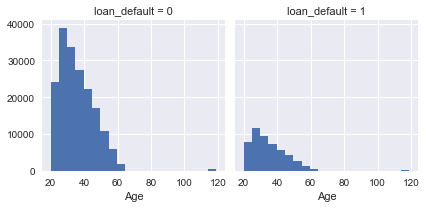

In [215]:
g = sns.FacetGrid(train_df, col='loan_default')
g.map(plt.hist, 'Age', bins=20)

In [220]:
train_df.loc[train_df['Age'] > 118]

,ltv,branch_id,manufacturer_id,Date.of.Birth,State_ID,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.OVERDUE.ACCTSBand,SEC.CURRENT.BALANCEBand,PRIMARY.INSTAL.AMTBand,SEC.INSTAL.AMTBand,NEW.ACCTS.IN.LAST.SIX.MONTHSBand,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHSBand,NO.OF_INQUIRIESBand,Age,Avg_Acnt_Age_Mnths,Credit_His_Length_Mnths
874,71.69,11,49,16-07-00,3,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
1300,75.15,20,45,05-03-00,5,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
1864,83.64,63,86,01-01-00,10,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
1872,70.33,63,86,18-08-00,10,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
1874,89.23,63,86,01-01-00,10,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
1942,74.62,48,86,01-01-00,5,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
2415,74.33,42,86,07-02-00,3,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
3252,77.87,16,86,19-02-00,14,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0
3446,55.78,16,86,19-01-00,14,C-Very Low Risk,2,1,0,98507,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,3,4
3686,76.68,16,86,01-01-00,17,No Bureau History Available,0,0,0,0,...,"(-0.008, 1.6]","(-611254.499, 6746852.8]","(-25642.806, 5128561.2]","(-4170.901, 834180.2]","(-0.035, 7.0]","(-0.02, 4.0]","(-0.036, 6.0]",119,0,0


#Pending still
Age has to be corrected and Bands has to be given ordinal values